### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-11/12/19
#### Clasificacion de RWE-DWT de MI-EEG con CNN-1D
##### 10 ejecuciones independientes para obtener la media y desviacion estandar
##### Se agrego lo de la transpuesta

In [0]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 3D
x_train = x_train.reshape((n_samples_train, 22, 3))
x_test = x_test.reshape((n_samples_test, 22, 3))

print(x_train.shape)
print(x_test.shape)

(288, 22, 3)
(288, 22, 3)


In [9]:
x_train = np.transpose(x_train, (0,2,1))
x_test = np.transpose(x_test, (0,2,1))

print(x_train.shape)
print(x_test.shape)

(288, 3, 22)
(288, 3, 22)


Iteration: 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
288/288 [==============================] - 0s 39us/sample - loss: 2.0339 - acc: 0.4340
kappa:  0.24537037037037035
confusion matrix:
 [[24 24 14 10]
 [ 6 33 22 11]
 [ 7 14 39 12]
 [ 8 10 25 29]]
(0.44962066905615294, 0.4340277777777778, 0.43198828806614087, None)


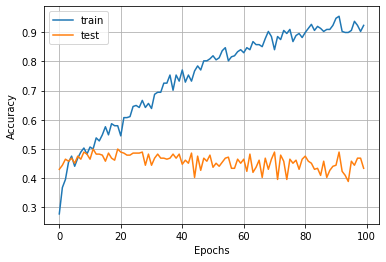

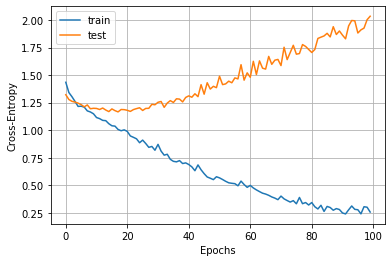

Iteration: 2
288/288 [==============================] - 0s 39us/sample - loss: 1.8739 - acc: 0.4514
kappa:  0.2685185185185185
confusion matrix:
 [[28 20 12 12]
 [ 9 30 20 13]
 [11 12 39 10]
 [ 9 11 19 33]]
(0.4552036063163549, 0.4513888888888889, 0.450202920872528, None)


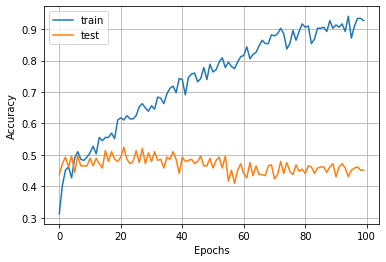

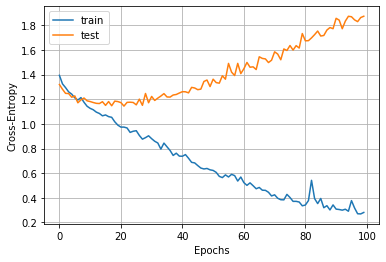

Iteration: 3
288/288 [==============================] - 0s 38us/sample - loss: 2.0364 - acc: 0.4583
kappa:  0.2777777777777778
confusion matrix:
 [[30 21 11 10]
 [ 9 28 22 13]
 [11 15 33 13]
 [11  8 12 41]]
(0.4590591557804673, 0.4583333333333333, 0.4575880697268899, None)


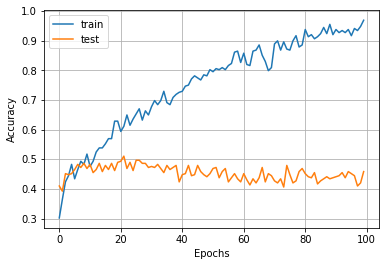

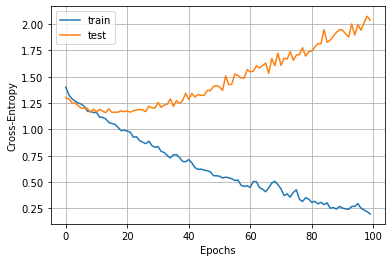

Iteration: 4
288/288 [==============================] - 0s 38us/sample - loss: 1.9752 - acc: 0.4167
kappa:  0.2222222222222222
confusion matrix:
 [[25 23 13 11]
 [ 9 25 21 17]
 [10 13 36 13]
 [13  7 18 34]]
(0.41716694811896055, 0.41666666666666663, 0.4143311975953172, None)


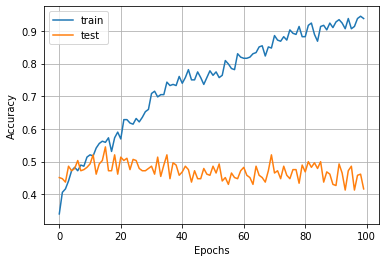

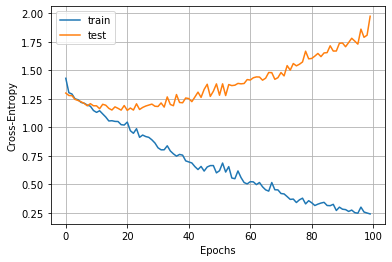

Iteration: 5
288/288 [==============================] - 0s 39us/sample - loss: 1.8346 - acc: 0.4410
kappa:  0.25462962962962965
confusion matrix:
 [[24 23 14 11]
 [12 33 17 10]
 [10 19 34  9]
 [11 10 15 36]]
(0.44493561778778495, 0.4409722222222222, 0.44039568508708093, None)


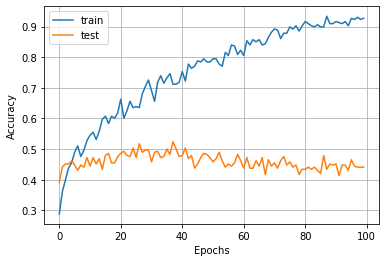

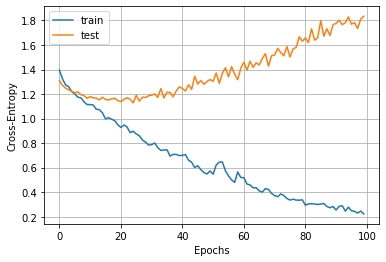

Iteration: 6
288/288 [==============================] - 0s 56us/sample - loss: 1.8556 - acc: 0.4479
kappa:  0.26388888888888884
confusion matrix:
 [[30 22  8 12]
 [10 32 14 16]
 [10 14 31 17]
 [ 7 10 19 36]]
(0.4528930499325236, 0.4479166666666667, 0.4482316841465268, None)


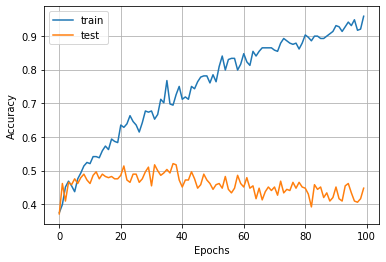

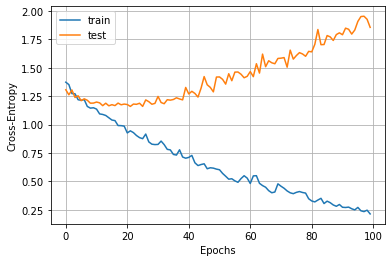

Iteration: 7
288/288 [==============================] - 0s 47us/sample - loss: 2.0151 - acc: 0.3819
kappa:  0.17592592592592593
confusion matrix:
 [[26 20 17  9]
 [10 28 14 20]
 [ 9 14 34 15]
 [14 13 23 22]]
(0.38342706728299947, 0.3819444444444445, 0.38043488138700554, None)


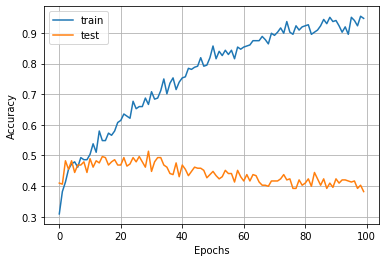

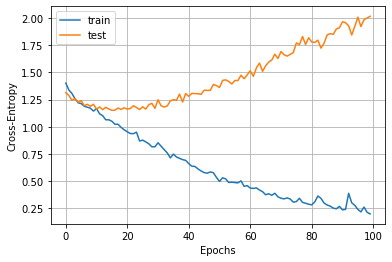

Iteration: 8
288/288 [==============================] - 0s 41us/sample - loss: 1.8671 - acc: 0.4479
kappa:  0.26388888888888884
confusion matrix:
 [[30 20 11 11]
 [ 8 25 23 16]
 [10  8 40 14]
 [10  6 22 34]]
(0.4527425482174167, 0.44791666666666663, 0.4454983402638801, None)


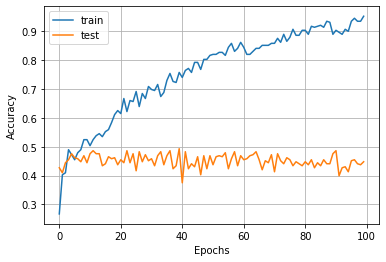

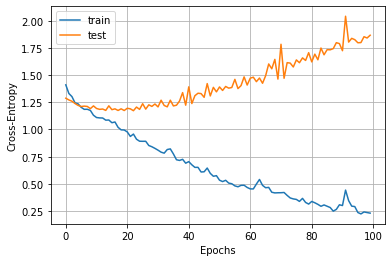

Iteration: 9
288/288 [==============================] - 0s 47us/sample - loss: 1.8422 - acc: 0.4514
kappa:  0.2685185185185185
confusion matrix:
 [[31 20 12  9]
 [ 7 29 22 14]
 [ 9 13 36 14]
 [ 8 10 20 34]]
(0.4613218452126903, 0.45138888888888895, 0.4527339185311626, None)


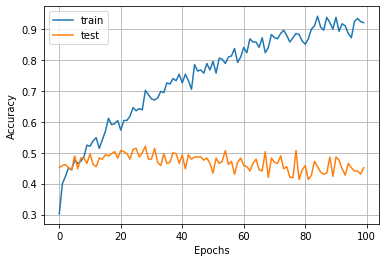

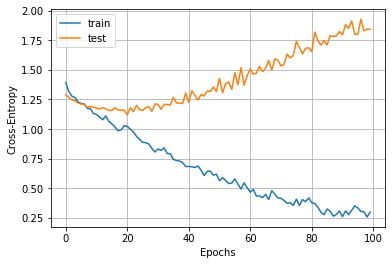

Iteration: 10
288/288 [==============================] - 0s 50us/sample - loss: 2.0051 - acc: 0.4410
kappa:  0.25462962962962965
confusion matrix:
 [[23 21 14 14]
 [ 9 28 17 18]
 [11  9 31 21]
 [10  7 10 45]]
(0.4386176809862794, 0.4409722222222222, 0.43418161108725734, None)


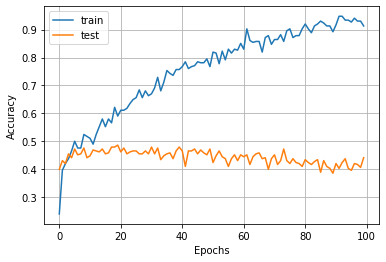

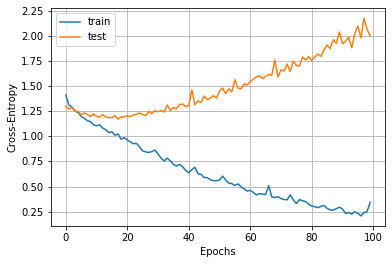


Resultados:
loss: [2.033932712343004, 1.8739178710513644, 2.036364687813653, 1.9751611418194241, 1.8345616790983412, 1.8555984497070312, 2.0150847699907093, 1.8670664893256292, 1.8421877092785306, 2.0051461590660944]
accuracy: [0.4340278, 0.4513889, 0.45833334, 0.41666666, 0.4409722, 0.44791666, 0.38194445, 0.44791666, 0.4513889, 0.4409722]
kappa: [0.24537037037037035, 0.2685185185185185, 0.2777777777777778, 0.2222222222222222, 0.25462962962962965, 0.26388888888888884, 0.17592592592592593, 0.26388888888888884, 0.2685185185185185, 0.25462962962962965]
precision: [0.44962066905615294, 0.4552036063163549, 0.4590591557804673, 0.41716694811896055, 0.44493561778778495, 0.4528930499325236, 0.38342706728299947, 0.4527425482174167, 0.4613218452126903, 0.4386176809862794]
recall: [0.4340277777777778, 0.4513888888888889, 0.4583333333333333, 0.41666666666666663, 0.4409722222222222, 0.4479166666666667, 0.3819444444444445, 0.44791666666666663, 0.45138888888888895, 0.4409722222222222]
f1: [0.4319882

In [10]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(Conv1D(64,3, activation='relu', input_shape=(3,22)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [11]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 1, 64)             4288      
_________________________________________________________________
flatten_9 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 516       
Total params: 13,124
Trainable params: 13,124
Non-trainable params: 0
_________________________________________________________________


In [12]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("std: %.4f" % np.std(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.4372
std: (+/- 0.0214)
kappa: 0.2495
std: 0.0286
precision: 0.4415
recall: 0.4372
f1: 0.4356
